# Logistic Regression with Titanic dataset

![Titanic](Titanic.webp)

In [38]:
#%pip install matplotlib 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load dataset Titanic

In [40]:
X_train = pd.read_csv('dataset/train_X.csv')
Y_train = pd.read_csv('dataset/train_Y.csv')
X_test = pd.read_csv('dataset/test_X.csv')
Y_test = pd.read_csv('dataset/test_Y.csv')

In [41]:
X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [42]:
Y_train.head()

,Id,Survived
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0


In [43]:
X_train = X_train.drop('Id',axis=1)
Y_train = Y_train.drop('Id',axis=1)
X_test = X_test.drop('Id',axis=1)
Y_test = Y_test.drop('Id',axis=1)

In [44]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [45]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (891, 7)
Y_train shape:  (891, 1)
X_test shape:  (418, 7)
Y_test shape:  (418, 1)


In [46]:
X_train = X_train.T
Y_train = Y_train.T

X_test = X_test.T
Y_test = Y_test.T

In [47]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (7, 891)
Y_train shape:  (1, 891)
X_test shape:  (7, 418)
Y_test shape:  (1, 418)


# Logistic Regression Overview :

## Equations :

$ W = \begin{bmatrix}w_1 \\ w_2 \\ . \\ . \\ w_n \end{bmatrix}_{ n x 1}$ ......... initialize with zeros

$ B = single$  $weight/parameter $

$ X = \begin{bmatrix}. & . & .  \\ .  & . & .  \\ . & . & .  \\ . & . & .  \\ \end{bmatrix}_{n x m}$

$ Y = \begin{bmatrix}. & . & . & . & . \end{bmatrix}_{1 x m}$


$\sigma = \frac{1}{(1 + e^{-x})}  $   ......... (sigmoid function)


A = $\sigma ( W^T*X + b ) $    ........ (probabilistic predictions of shape (1 x m ) )

<img src = "sigmoid.png" width = 400px>


## Cost function :

$ cost = - \frac{1}{m} \sum_{i=1}^m [ y*log(a) + (1 - y)*log(1 - a) ] $

## Gradient Descent 

$dW = \frac{\partial COST }{\partial W} = ( A - Y )*X^T $ ...... shape (1 x n) 

$dB = \frac{\partial COST }{\partial B} = ( A - Y ) $

$W = W - \alpha * dW^T $

$B = B - \alpha * dB $


<img src = "gradient-descent.png" width = 300px>

In [48]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [49]:
def cost_function(Y, Y_hat):
    m = Y.shape[1]
    cost = (-1/m) * np.sum(np.multiply(Y, np.log(Y_hat)) + np.multiply(1 - Y, np.log(1 - Y_hat)))
    return cost

In [50]:
def model(X_train, Y_train, learning_rate, iterations):
    
    m = X_train.shape[1] # number of observations
    n = X_train.shape[0] # number of features
    
    W = np.zeros((n,1)) 
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        Z = np.dot(W.T, X_train) + B
        Y_pred = sigmoid(Z)
        cost = cost_function(Y_train, Y_pred)
        
        dW = (1/m) * np.dot((Y_pred - Y_train),X_train.T)
        dB = (1/m) * np.sum(Y_pred - Y_train)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        cost_list.append(cost)
        
        if i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
    
    return W, B, cost_list
        
        

In [51]:
iterations = 100000
learning_rate = 0.0015

weight, bias , cost_list = model(X_train, Y_train, learning_rate, iterations)

Cost after iteration 0: 0.6931471805599454
Cost after iteration 10000: 0.4965277769389531
Cost after iteration 20000: 0.46674868550665993
Cost after iteration 30000: 0.45687787762434423
Cost after iteration 40000: 0.45288994293089646
Cost after iteration 50000: 0.45093260252226425
Cost after iteration 60000: 0.4497708749009468
Cost after iteration 70000: 0.4489640829216279
Cost after iteration 80000: 0.44834126966124827
Cost after iteration 90000: 0.44783045246935776


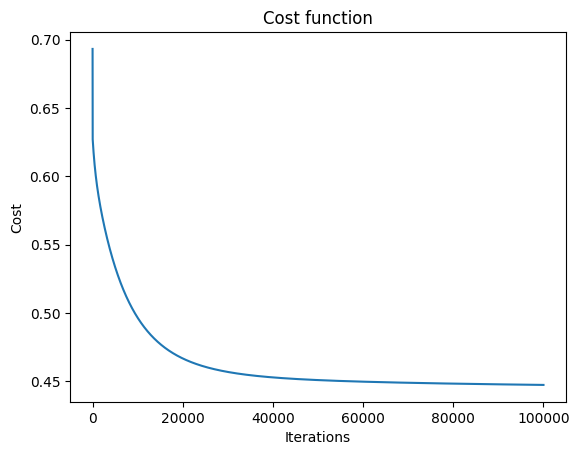

In [52]:
plt.plot(np.arange(iterations), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function')
plt.show()

In [53]:
def accuracy(X, Y, W, B):
    Z = np.dot(W.T, X) + B
    Y_pred = sigmoid(Z)
    #Y_pred = Y_pred >0.5
    #Y_pred = Y_pred.astype(int)
    
    Y_pred = np.where(Y_pred > 0.5, 1, 0)
        
    accuracy = (1-np.sum(np.abs(Y_pred - Y)) / Y.shape[1]) * 100
    print("Accuracy: {} %".format(accuracy))

In [54]:
accuracy(X_test, Y_test, weight, bias)

Accuracy: 91.38755980861244 %
